In [1]:
%load_ext autoreload
%autoreload 

### import library

In [1]:
import online_retail_analysis.utils.paths as path
from online_retail_analysis.features.build_features import Calculate_RFM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer ,StandardScaler
from sklearn.cluster import MiniBatchKMeans as KMeans

# sns.set_style("whitegrid")
%matplotlib inline
pd.options.display.float_format = '{:,.3f}'.format

### import data

In [2]:
df_proces = pd.read_csv(path.data_processed_dir('data_clean.csv'))
df_proces['InvoiceDate']= pd.to_datetime(df_proces['InvoiceDate'])


In [3]:
df_proces.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
date           0
month          0
days           0
cost           0
dtype: int64

In [4]:
df_proces

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,month,days,cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.000,2010-12-01 08:26:00,2.550,"17,850.000",United Kingdom,2010-12-01 08:26:00,12,Wednesday,15.300
1,536365,71053,WHITE METAL LANTERN,6.000,2010-12-01 08:26:00,3.390,"17,850.000",United Kingdom,2010-12-01 08:26:00,12,Wednesday,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.000,2010-12-01 08:26:00,2.750,"17,850.000",United Kingdom,2010-12-01 08:26:00,12,Wednesday,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.000,2010-12-01 08:26:00,3.390,"17,850.000",United Kingdom,2010-12-01 08:26:00,12,Wednesday,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.000,2010-12-01 08:26:00,3.390,"17,850.000",United Kingdom,2010-12-01 08:26:00,12,Wednesday,20.340
...,...,...,...,...,...,...,...,...,...,...,...,...
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.000,2011-12-09 12:50:00,0.850,"12,680.000",France,2011-12-09 12:50:00,12,Friday,10.200
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.000,2011-12-09 12:50:00,2.100,"12,680.000",France,2011-12-09 12:50:00,12,Friday,12.600
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.000,2011-12-09 12:50:00,4.150,"12,680.000",France,2011-12-09 12:50:00,12,Friday,16.600
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.000,2011-12-09 12:50:00,4.150,"12,680.000",France,2011-12-09 12:50:00,12,Friday,16.600


### RFM Segmetation

In [5]:
from online_retail_analysis.features.build_features import Calculate_RFM , check_skew

df_rfm_labeling = Calculate_RFM(df_proces,labels=True)
df_rfm_labeling

,CustomerID,Recency,MonetaryValue,Frequency,R,F,M,RFM_score,RFM_Segment,label
0,"12,346.000",326,37.440,1,1,1,1,3,111,Lost Customers
1,"12,347.000",2,"4,015.210",182,4,4,4,12,444,Best Customers
2,"12,348.000",75,732.620,31,2,2,3,7,223,Customers Needing Attention
3,"12,349.000",19,"1,389.150",73,3,3,3,9,333,Potential Costumers
4,"12,350.000",310,302.900,17,1,1,2,4,112,At Risk Customers
...,...,...,...,...,...,...,...,...,...,...
4333,"18,280.000",278,177.700,10,1,1,1,3,111,Lost Customers
4334,"18,281.000",181,63.920,7,1,1,1,3,111,Lost Customers
4335,"18,282.000",8,162.250,12,4,1,1,6,411,Potential Costumers
4336,"18,283.000",4,"2,040.770",721,4,4,4,12,444,Best Customers


In [6]:
df_rfm_labeling['label'].value_counts()

Potential Costumers            1029
At Risk Customers               920
Loyal Custumers                 806
Customers Needing Attention     594
Best Customers                  466
Lost Customers                  407
Cant' Lose Them                  59
Others                           57
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='CustomerID'>

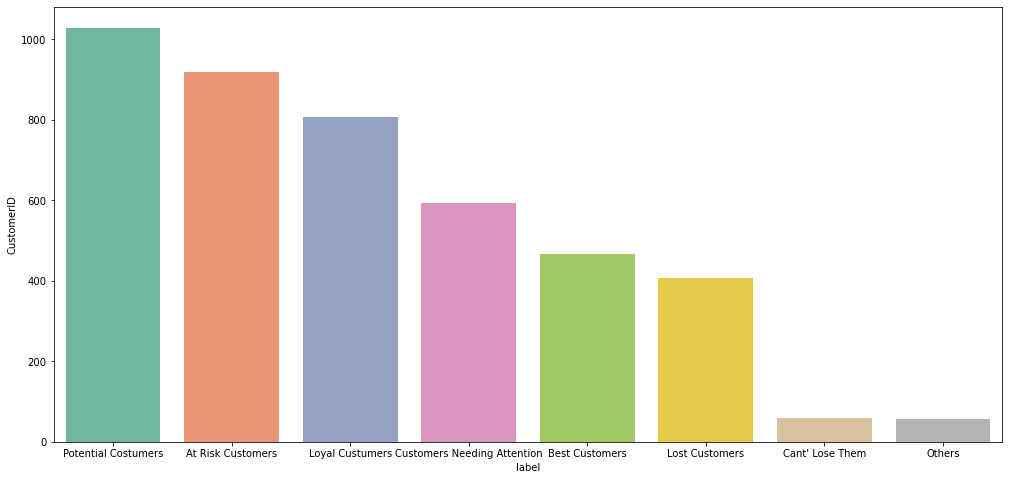

In [7]:
segmentation1=df_rfm_labeling.groupby('label')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(17,8))
segmentation1.drop([0],inplace=False)
sns.barplot(data=segmentation1, x="label", y="CustomerID", palette = "Set2")

In [8]:
df_rfm = Calculate_RFM(df_proces,labels=False)

new_rfm = df_rfm.drop('CustomerID', axis=1)

new_rfm.head()

,Recency,MonetaryValue,Frequency
0,326,37.440,1
1,2,"4,015.210",182
2,75,732.620,31
3,19,"1,389.150",73
4,310,302.900,17


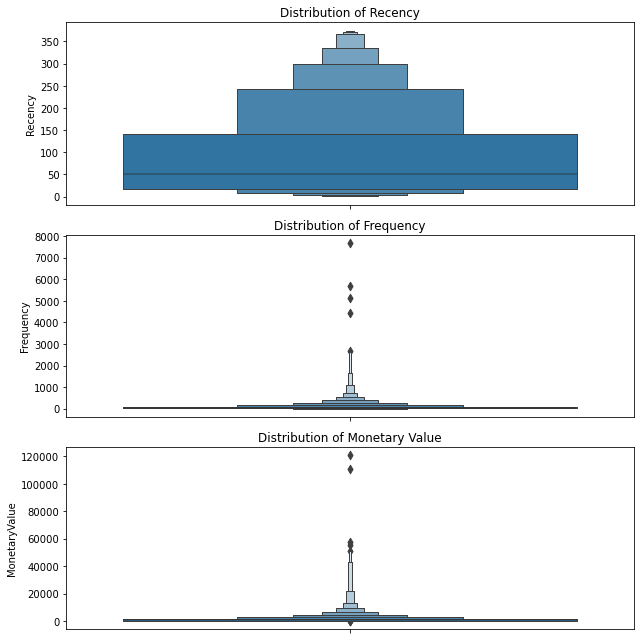

In [9]:
from online_retail_analysis.visualization.visualize import boxplot_vis
boxplot_vis(new_rfm)


In [10]:
def rm_outliers(df, col):
    p_05 = df[col].quantile(0.05) # 5th quantile
    p_95 = df[col].quantile(0.95) # 95th quantile
    df[col].clip(p_05, p_95, inplace=True)
    return df

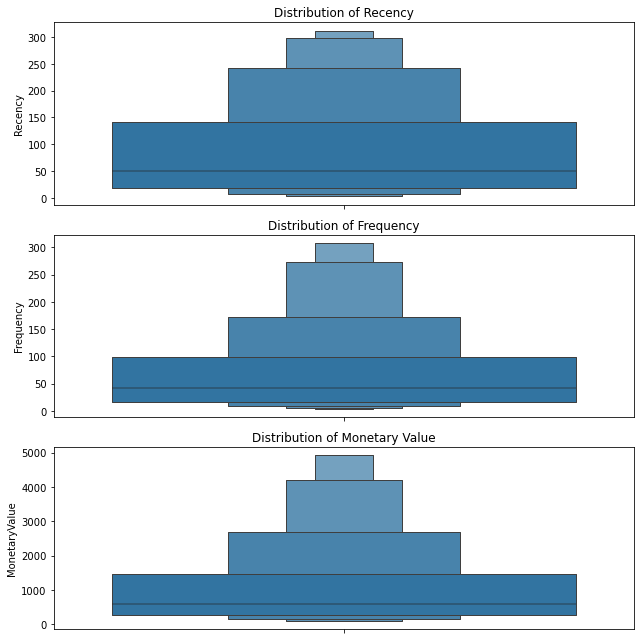

In [11]:
rfm_copy = new_rfm.copy()
rm_outliers(rfm_copy , 'Recency')
rm_outliers(rfm_copy , 'Frequency')
rm_outliers(rfm_copy , 'MonetaryValue')
boxplot_vis(rfm_copy)

Recency's: Skew: 1.1216760670663248, : SkewtestResult(statistic=24.707286046845308, pvalue=8.930520132664315e-135)
Frequency's: Skew: 1.621498296379552, : SkewtestResult(statistic=31.64097348083877, pvalue=1.0093366446246754e-219)
MonetaryValue's: Skew: 1.708583662438927, : SkewtestResult(statistic=32.676020766861264, pvalue=3.422522802008332e-234)


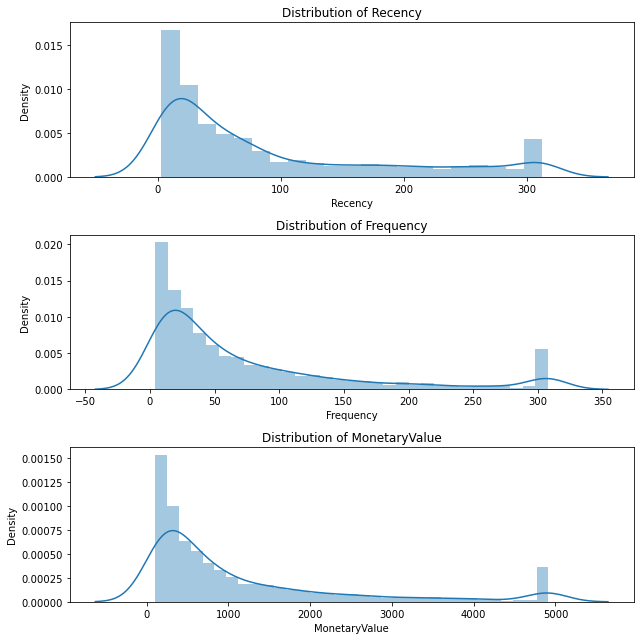

In [12]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(rfm_copy,'Recency')

plt.subplot(3, 1, 2)
check_skew(rfm_copy,'Frequency')

plt.subplot(3, 1, 3)
check_skew(rfm_copy,'MonetaryValue')


plt.tight_layout()
plt.savefig(path.reports_figures_dir('before_transform.png'), format='png', dpi=1000)

Recency's: Skew: -0.36373885171536413, : SkewtestResult(statistic=-9.500574744218628, pvalue=2.087350114028487e-21)
Frequency's: Skew: -0.12635014469905967, : SkewtestResult(statistic=-3.3898658323962985, pvalue=0.0006992683804833991)
MonetaryValue's: Skew: 0.13548688066607784, : SkewtestResult(statistic=3.632874194610304, pvalue=0.0002802816903238514)


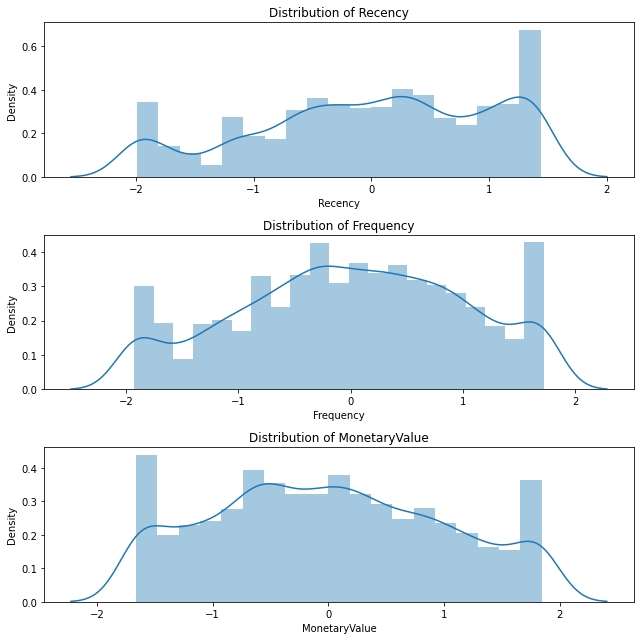

In [14]:

transformer = FunctionTransformer(np.log)
new_rfm_trans_log = transformer.fit_transform(rfm_copy)
scaler = StandardScaler()
new_rfm_trans_log_sc = scaler.fit_transform(new_rfm_trans_log)
new_rfm_trans_log_sc = pd.DataFrame(new_rfm_trans_log_sc, columns=new_rfm_trans_log.columns)

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(new_rfm_trans_log_sc,'Recency')

plt.subplot(3, 1, 2)
check_skew(new_rfm_trans_log_sc,'Frequency')

plt.subplot(3, 1, 3)
check_skew(new_rfm_trans_log_sc,'MonetaryValue')

plt.tight_layout()
plt.savefig(path.reports_figures_dir('after_transform_Scaler.png'), format='png', dpi=1000)

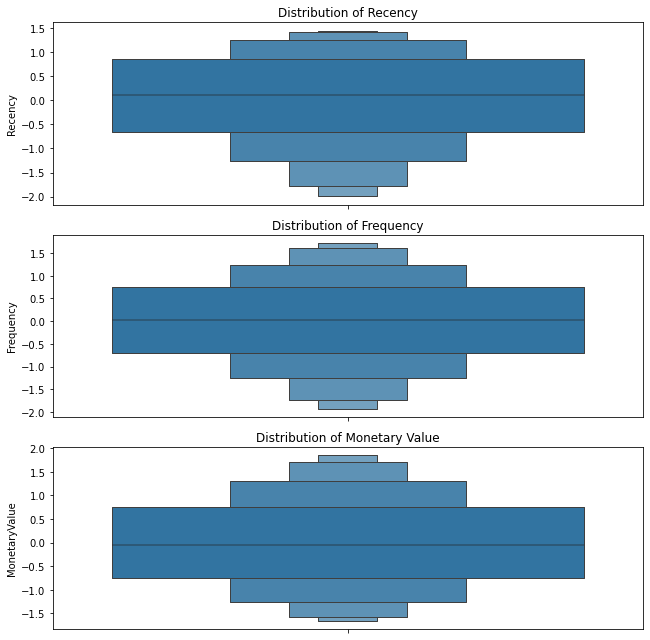

In [15]:
boxplot_vis(new_rfm_trans_log_sc)

### K-Means cluster

In [16]:
def train_elbow_cluster(train,start=1,finish=10,each=1):
    wcss = {} #dicionario vacio para guardar los errores
    for i in range(start,finish,each):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(train)
        wcss[i] = kmeans.inertia_ #suma de distancias cuadradas a los centros del grupos más cercanos
    plt.title('Metodo de Elbow ')
    plt.xlabel('k= n grupos')
    plt.ylabel('WCSS')
    sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
    plt.show()
#    return wcss 

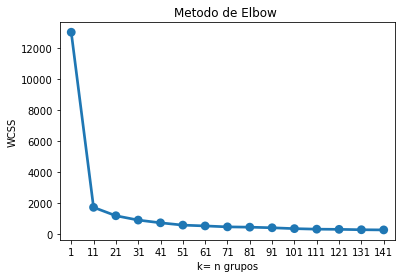

In [17]:
X = np.asarray(new_rfm_trans_log_sc)
train_elbow_cluster(X,finish=150,each=10)

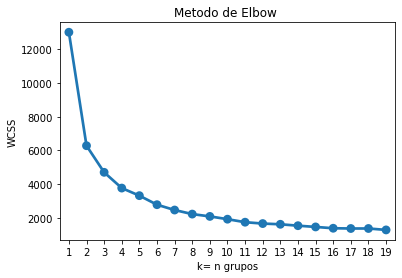

In [18]:
train_elbow_cluster(X,finish=20,each=1)

In [19]:
def Kmeans(train, clusters_number, original_df_rfm):
    kmeans = KMeans(n_clusters = clusters_number, random_state = 42)
    # Predict the cluster
    y_kmeans = kmeans.fit_predict(train)
    # Create a cluster label column in original dataset
    df_cluster = original_df_rfm.assign(Cluster = y_kmeans)
    return df_cluster

In [20]:
rfm_k4 = Kmeans(X, 4, df_rfm)

rfm_k5 = Kmeans(X, 5, df_rfm)

rfm_k6 = Kmeans(X, 6, df_rfm)
rfm_k4

,CustomerID,Recency,MonetaryValue,Frequency,Cluster
0,"12,346.000",326,37.440,1,0
1,"12,347.000",2,"4,015.210",182,2
2,"12,348.000",75,732.620,31,1
3,"12,349.000",19,"1,389.150",73,1
4,"12,350.000",310,302.900,17,0
...,...,...,...,...,...
4333,"18,280.000",278,177.700,10,0
4334,"18,281.000",181,63.920,7,0
4335,"18,282.000",8,162.250,12,3
4336,"18,283.000",4,"2,040.770",721,2


In [21]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=df_rfm_original.index, 
                                       columns=df_rfm_original.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']
    normalised_df_rfm['CustomerID'] = df_rfm_kmeans['CustomerID']
    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                    var_name='Metric', 
                    value_name='Value')
    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    return

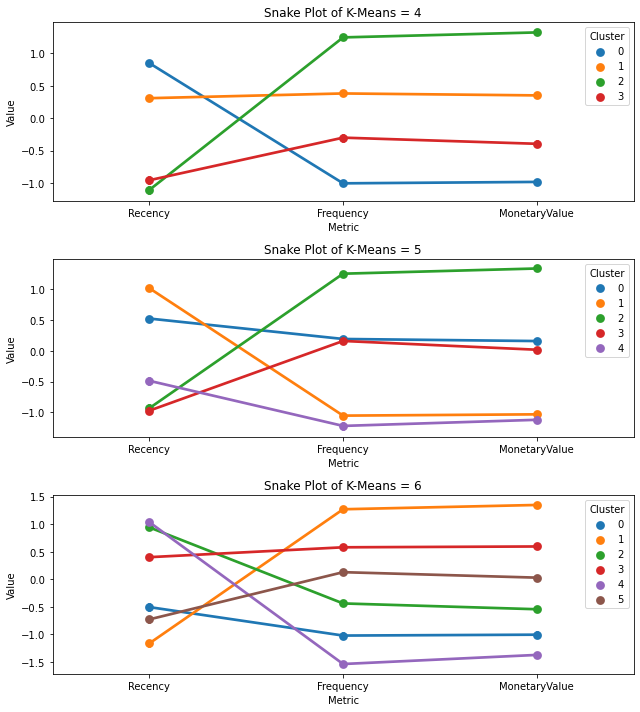

In [23]:
plt.figure(figsize=(9, 10))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 4')
snake_plot(new_rfm_trans_log_sc, rfm_k4, new_rfm)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 5')
snake_plot(new_rfm_trans_log_sc, rfm_k5, new_rfm)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 6')
snake_plot(new_rfm_trans_log_sc, rfm_k6, new_rfm)

plt.tight_layout()

## Evaluation model
### Davies bouldin Score: The smaller Davies Bouldin Score is The more optimal the cluster.

In [24]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
print('davies score to k=4: {}'.format(davies_bouldin_score(X, rfm_k4.Cluster)))
print('davies score to k=5: {}'.format(davies_bouldin_score(X, rfm_k5.Cluster)))
print('davies score to k=6: {}'.format(davies_bouldin_score(X, rfm_k6.Cluster)))

davies score to k=4: 0.9896709064887643
davies score to k=5: 1.0514974066903628
davies score to k=6: 1.0089784565121471


K-Means with 4 clusters has lowest davies bouldin score than other cluster. Therefore the optimum cluster is 4.

### Silhouetter Score: The higher Silhouuter Score is the more optimal the cluster.

In [25]:
print('davies score to k=4: {}'.format(silhouette_score(X, rfm_k4.Cluster)))
print('davies score to k=5: {}'.format(silhouette_score(X, rfm_k5.Cluster)))
print('davies score to k=6: {}'.format(silhouette_score(X, rfm_k6.Cluster)))


davies score to k=4: 0.3414802066134925
davies score to k=5: 0.3039261847290097
davies score to k=6: 0.3035637665746879


K-Means with 4 clusters has higher Silhoutter score than other cluster. Therefore the optimum cluster is 4.

In [26]:
rfm_k4.to_csv(path.data_processed_dir('data_clustering.csv'),index=False)